In [1]:
import tensorflow as tf
print("Version of tensorflow is : ",tf.__version__)

Version of tensorflow is :  1.15.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
X = np.arange(1,11,0.1)
y = 3 * X + 2
print("X := %s"%str(X[:5]))
print("y := %s"%str(y[:5]))

X := [1.  1.1 1.2 1.3 1.4]
y := [5.  5.3 5.6 5.9 6.2]


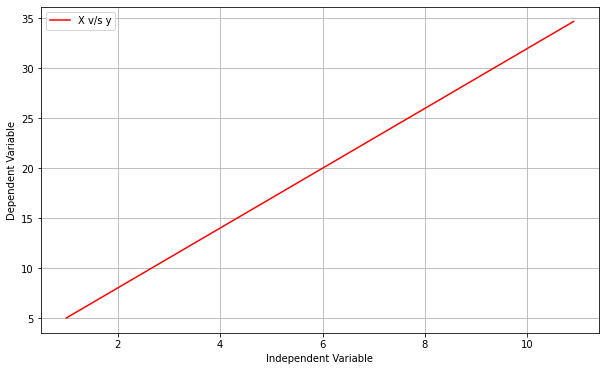

In [162]:
plt.figure(figsize=(10,6))
plt.plot(X,y,'r-',label = 'X v/s y')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.legend()
plt.grid(True)

In [163]:
data = pd.read_csv("../../Data/ex1data1.csv")

In [164]:
data.head()

,Sq. Ft,Price
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [165]:
X = np.asanyarray(data[['Sq. Ft']])
y = np.asanyarray(data[['Price']])

In [166]:
print("X.shape := ",X.shape)
print("y.shape := ",y.shape)

X.shape :=  (97, 1)
y.shape :=  (97, 1)


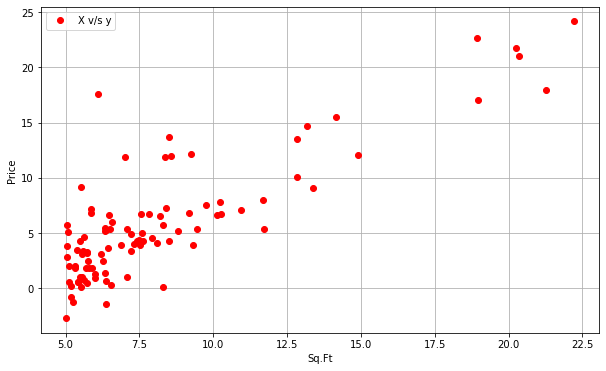

In [167]:
plt.figure(figsize=(10,6))
plt.plot(X[:,0],y[:,0],'ro',label = 'X v/s y')
plt.xlabel("Sq.Ft")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

In [168]:
X = np.where(X<0 , X*-1,X)
y = np.where(y<0 , y*-1,y)

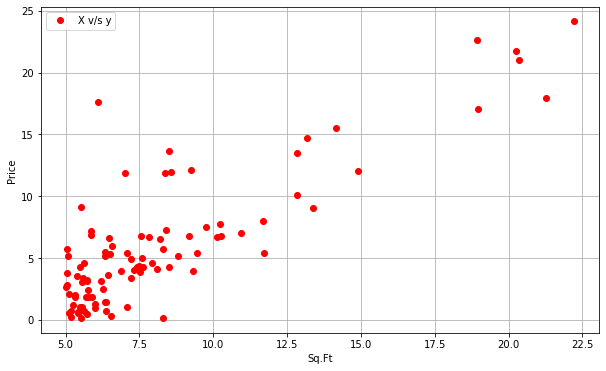

In [169]:
plt.figure(figsize=(10,6))
plt.plot(X[:,0],y[:,0],'ro',label = 'X v/s y')
plt.xlabel("Sq.Ft")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

In [180]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [176]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
X = np.asanyarray(df[['ENGINESIZE']])
y = np.asanyarray(df[['CO2EMISSIONS']])

In [177]:
w = tf.Variable(0.0)
b = tf.Variable(0.2)
y_pred = w * X + b

In [178]:
loss = tf.reduce_mean(tf.square(y_pred - y))
optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [179]:
loss_values = []
coef = {}
for step in range(1001):
    _ , train_loss , w_val , b_val = sess.run([train,loss,w,b])
    loss_values.append(train_loss)
    if step % 50 == 0:
        print("Loss on epoch %d is := %f"%(step,train_loss))
        coef["w"+str(step)] = w_val
        coef["b"+str(step)] = b_val        

Loss on epoch 0 is := 69562.945312
Loss on epoch 50 is := 1367.906372
Loss on epoch 100 is := 1046.705322
Loss on epoch 150 is := 970.219727
Loss on epoch 200 is := 952.006592
Loss on epoch 250 is := 947.669678
Loss on epoch 300 is := 946.636902
Loss on epoch 350 is := 946.390930
Loss on epoch 400 is := 946.332336
Loss on epoch 450 is := 946.318298
Loss on epoch 500 is := 946.315063
Loss on epoch 550 is := 946.314392
Loss on epoch 600 is := 946.314026
Loss on epoch 650 is := 946.314026
Loss on epoch 700 is := 946.314087
Loss on epoch 750 is := 946.314087
Loss on epoch 800 is := 946.313965
Loss on epoch 850 is := 946.314270
Loss on epoch 900 is := 946.314331
Loss on epoch 950 is := 946.314331
Loss on epoch 1000 is := 946.314331


In [70]:
with tf.Session() as sess:
    sess.run(init)
    print("W := ",sess.run(w))
    print("b := ",sess.run(b))
    print("y_pred := ",sess.run(y_pred)[:5])
    print("Loss := ",sess.run(loss))

W :=  10.0
b :=  15.0
y_pred :=  [[ 76.101   ]
 [ 70.277   ]
 [100.186005]
 [ 85.032   ]
 [ 73.598   ]]
Loss :=  9378.465
